In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Se tienen las desigualdades
$$50x_1 + 24x_2\leq 2400$$
$$30x_1 + 33x_2\leq 2100$$

El despeje entonces como:

$$x_2 = \frac{2400 - 50x_1}{24} $$
$$x_2 = \frac{2100 - 30x_1}{33} $$

In [3]:
def x2_v1(x1):
    return (2400 - 50*x1)/24  # de la maquina A
def x2_v2(x1):
    return (2100 - 30*x1)/33  # de la maquina B

In [9]:
x1 = np.linspace(0, 100)

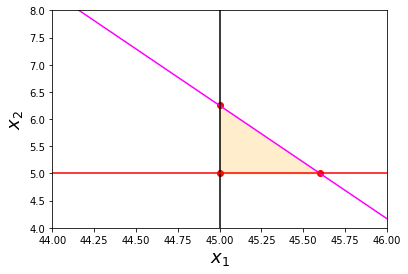

In [48]:
plt.plot(x1, x2_v1(x1), 'magenta') #desigualdad 1
plt.plot(x1, x2_v2(x1)) # desigualdad 2
plt.plot([45, 45], [0, 25], 'k')
plt.scatter([45, 45], [0, 25], s = 200, color = "red")
plt.plot([43, 47], [5, 5], 'r')
plt.scatter([43, 47], [5, 5], s = 200, color = "red")
plt.xlim(xmin = 44, xmax = 46)
plt.ylim(ymin = 4, ymax = 8)
plt.scatter([45], [6.25], color = 'red')
plt.scatter([45], [5], color = 'red')
plt.scatter([45.6], [5], color = 'red')
plt.fill_between(np.array([45, 45.6]), x2_v1(np.array([45, 45.6])),
                5*np.ones(2), alpha = .2, color = 'orange')
plt.xlabel(r"$x_1$", fontsize = 18)
plt.ylabel(r"$x_2$", fontsize = 18)
plt.show()

Ya tenemos un punto posible para la solución, $(45,5)$. Los otros son $(45.6, 5)$ y $(45, 6.25)$

In [49]:
import scipy.optimize as opt

In [61]:
c = np.array([-1, -1]) # min(-x1 - x2)
A = np.array([[50, 24], [30, 33]]) 
b = np.array([2400, 2100])
x1_bound = (45, None)
x2_bound = (5, None)

In [62]:
A

array([[50, 24],
       [30, 33]])

$$50x_1 + 24x_2\leq 2400$$
$$30x_1 + 33x_2\leq 2100$$

In [64]:
res = opt.linprog(c, A_ub=A, b_ub=b, bounds=(x1_bound, x2_bound), options={'disp': True})

Optimization terminated successfully.
         Current function value: -51.250000  
         Iterations: 4


In [65]:
res

     fun: -51.25
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([  0.  , 543.75,   0.  ,   1.25])
  status: 0
 success: True
       x: array([45.  ,  6.25])

En inventario teniamos 90 de $x_2$ y 30 de $x_1$